In [1]:
# Create a simple time series
import numpy as np
import pandas as pd

# Make a date index (2 years of daily data)
date_index = pd.date_range(start="2020-01-01", periods=730, freq="D")

# Create a toy series: trend + seasonality + noise
rng = np.random.default_rng(42)
trend = np.linspace(0, 10, 730)                        # slowly increasing
season = 3 * np.sin(2 * np.pi * np.arange(730) / 7)    # weekly pattern
noise = rng.normal(0, 1, 730)                          # random noise

y = 20 + trend + season + noise

# Put into a DataFrame
df = pd.DataFrame({"y": y}, index=date_index)
print(df.head())


                    y
2020-01-01  20.304717
2020-01-02  21.319228
2020-01-03  23.702670
2020-01-04  22.283368
2020-01-05  16.802183


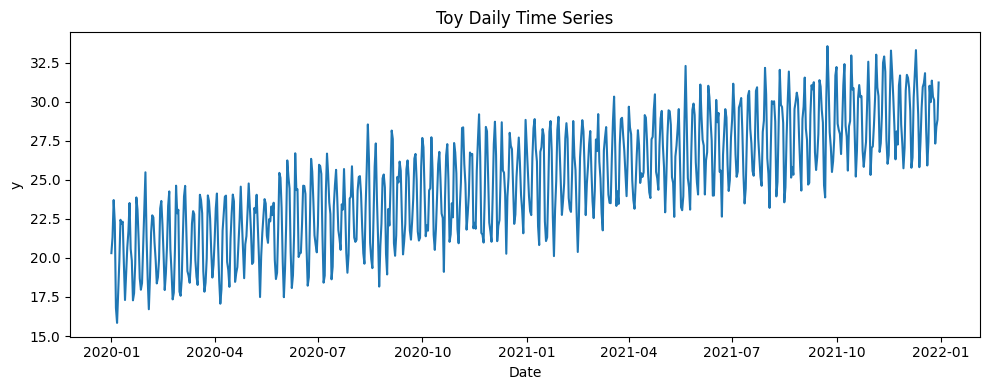

In [2]:
# Plot the data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(df.index, df["y"])
plt.title("Toy Daily Time Series")
plt.xlabel("Date")
plt.ylabel("y")
plt.tight_layout()
plt.show()

In [3]:
# Train–test split (respect time order!)
# Unlike usual ML, you must not shuffle time series.
# 80% train, 20% test
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test  = df.iloc[train_size:]

print("Train shape:", train.shape)
print("Test shape :", test.shape)

Train shape: (584, 1)
Test shape : (146, 1)


In [4]:
# Fit a simple ARIMA model
# ARIMA(p, d, q) is a classic time-series model. We’ll just pick (p=2, d=1, q=2) to start. Not optimal, just simple.
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA on the training data
model = ARIMA(train["y"], order=(2, 1, 2))
result = model.fit()

print(result.summary())

c:\Users\PC\anaconda3\envs\pytorch-iris\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  584
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -974.772
Date:                Thu, 04 Dec 2025   AIC                           1959.544
Time:                        13:58:42   BIC                           1981.385
Sample:                    01-01-2020   HQIC                          1968.057
                         - 08-06-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1777      0.022     53.027      0.000       1.134       1.221
ar.L2         -0.8772      0.020    -43.136      0.000      -0.917      -0.837
ma.L1         -1.5365      0.037    -41.072      0.0

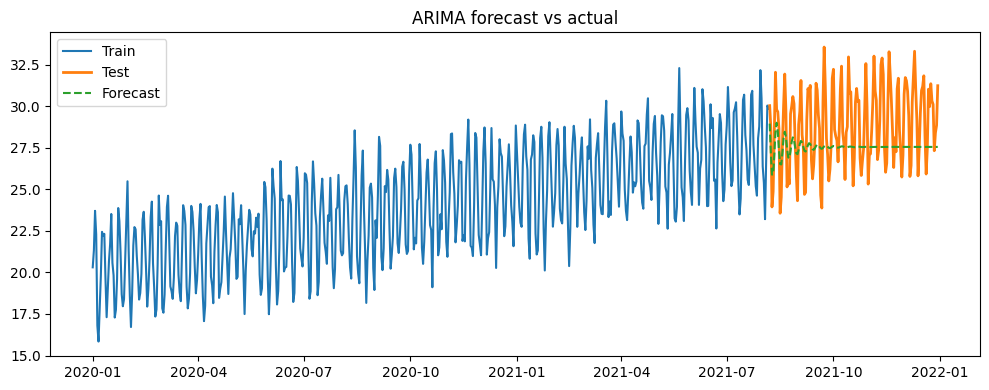

In [5]:
# Forecast and compare to test set
# Forecast the same number of steps as the test set
n_test = len(test)
forecast = result.forecast(steps=n_test)

# Put into a DataFrame with matching index
forecast = pd.Series(forecast, index=test.index)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(train.index, train["y"], label="Train")
plt.plot(test.index,  test["y"],  label="Test",  linewidth=2)
plt.plot(forecast.index, forecast, label="Forecast", linestyle="--")
plt.legend()
plt.title("ARIMA forecast vs actual")
plt.tight_layout()
plt.show()
